# Packages import

In [49]:
import numpy as np
import scipy as sp
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from my_package import my_functions  as mp


%matplotlib inline

## Create data

In [135]:
# features
X = np.full((10, 2), np.nan)
X[:3, :] = np.stack((np.arange(6, 19, 6), np.arange(6, 19, 6)*5), axis=0).T
X[3:5, :] = np.stack((np.arange(56, 63, 6), np.arange(56, 63, 6)*5), axis=0).T
X[5:, 0], X[5:, 1] = X[:5, 0]+2, X[:5, 1]-2

# classes
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

# Standardize
X = StandardScaler().fit_transform(X)

# Meshgrid for color display
h = 0.1
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

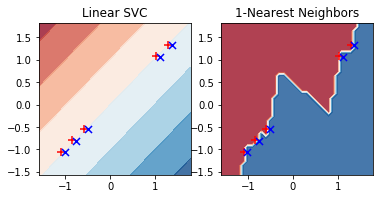

In [146]:
# Initilization
models = [svm.LinearSVC(), KNeighborsClassifier(n_neighbors=1)]
cm = plt.cm.RdBu
titles = ['Linear SVC', '1-Nearest Neighbors']

# Figure creation
fig, ax = plt.subplots(1, 2)
ax = fig.axes

# Launch model runing and plot
for i, m in enumerate(models):
    m.fit(X, y)
    if hasattr(m, "decision_function"):
        Z = m.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = m.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax[i].contourf(xx, yy, Z, cmap=cm, alpha=.8)
    
    # Plot the points
    ax[i].scatter(X[y == 0, 0], X[y == 0, 1], s=50,
               c='r', marker='+', edgecolors='k')
    ax[i].scatter(X[y == 1, 0], X[y == 1, 1], s=50,
               c='b', marker='x', edgecolors='k')

    # set figure
    ax[i].set_title(titles[i])
    ax[i].set_xlim(xx.min(), xx.max())
    ax[i].set_ylim(yy.min(), yy.max())
    ax[i].set_aspect('equal', 'box')
    
# save figure
plt.savefig("Figures/SVC_Vs_KNN.png", bbox_inches='tight', transparent=True, )